<a href="https://colab.research.google.com/github/rodrigorenemenegazzo/Python_QuantumComputing/blob/main/Computa%C3%A7%C3%A3o_qu%C3%A2ntica_Algoritmo_de_Grover_algoritmo_de_busca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

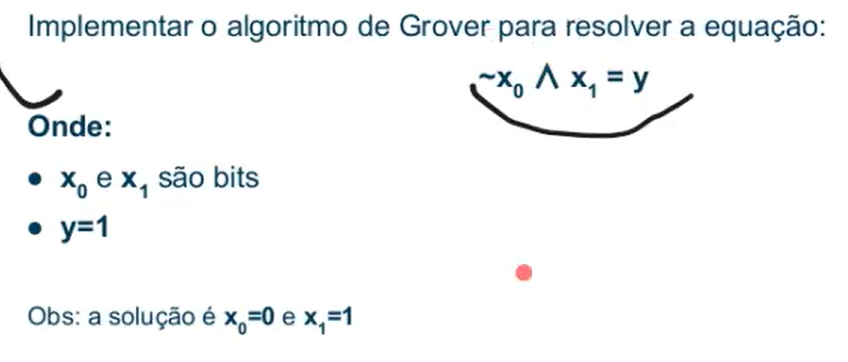

In [4]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a540fe8e292409a325ecbd83a26b1899d9b13a41fdef2f243c9ce35fcdec24dc
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


##importação dos pacotes

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.circuit.library import ZGate
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

## Criação do circuito quântico

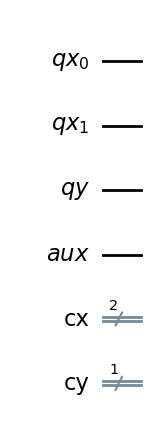

In [6]:
qx = QuantumRegister(2, 'qx')
qy = QuantumRegister(1, 'qy')
aux = QuantumRegister(1, 'aux')
cx = ClassicalRegister(2, 'cx')
cy = ClassicalRegister(1, 'cy')
qc = QuantumCircuit(qx, qy, aux, cx, cy)
qc.draw('mpl')

## Preparar o estado de superposição

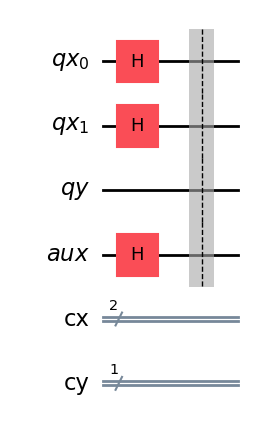

In [7]:
qc.h(qx)
qc.h(aux)
qc.barrier()
qc.draw('mpl')

## Criação do oráculo da expressão $y=\neg x_0 \wedge x_1$

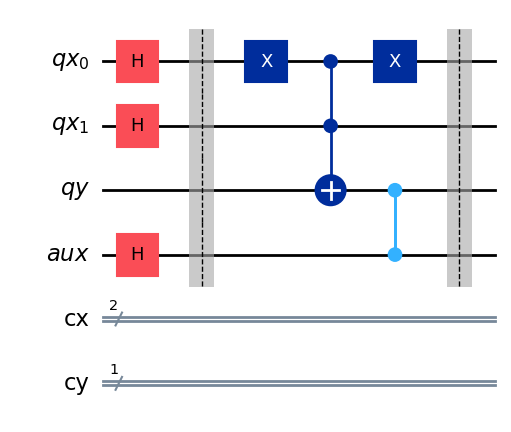

In [8]:
def apply_oracle():
  # Adicionar a NOT no X0
  qc.x(qx[0])

  # Adicionar a AND
  qc.ccx(
      control_qubit1=qx[0],
      control_qubit2=qx[1],
      target_qubit=qy[0]
  )

  # Adicionar a reversão da NOT no X0
  qc.x(qx[0])

  # Operação de inversão de fase
  qc.cz(qy[0], aux[0])

  qc.barrier()

apply_oracle()
qc.draw('mpl')


## Operador de difusão

In [9]:
cccz_gate = ZGate().control(3)
cccz_gate.label = 'CCCZ'

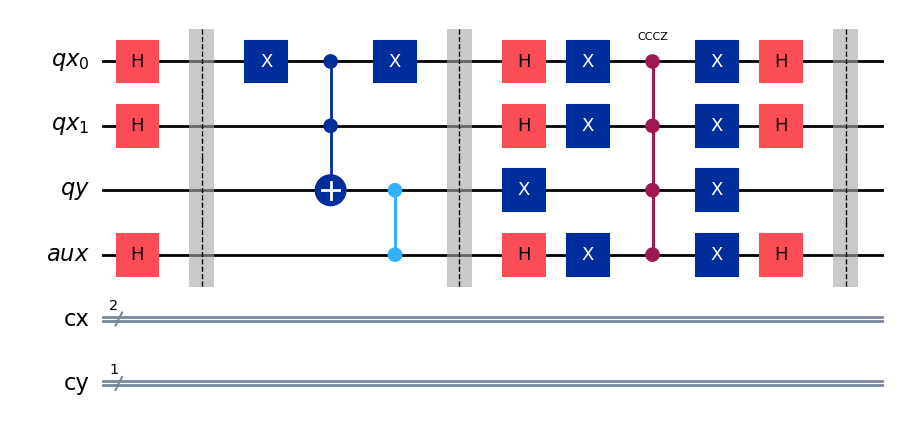

In [10]:
def apply_diff():
  qc.h(qx)
  qc.h(aux)
  qc.x(qx)
  qc.x(qy)
  qc.x(aux)
  qc.append(cccz_gate, [qx[0], qx[1], qy[0], aux[0]])
  qc.x(qx)
  qc.x(qy)
  qc.x(aux)
  qc.h(qx)
  qc.h(aux)
  qc.barrier()

apply_diff()
qc.draw('mpl')

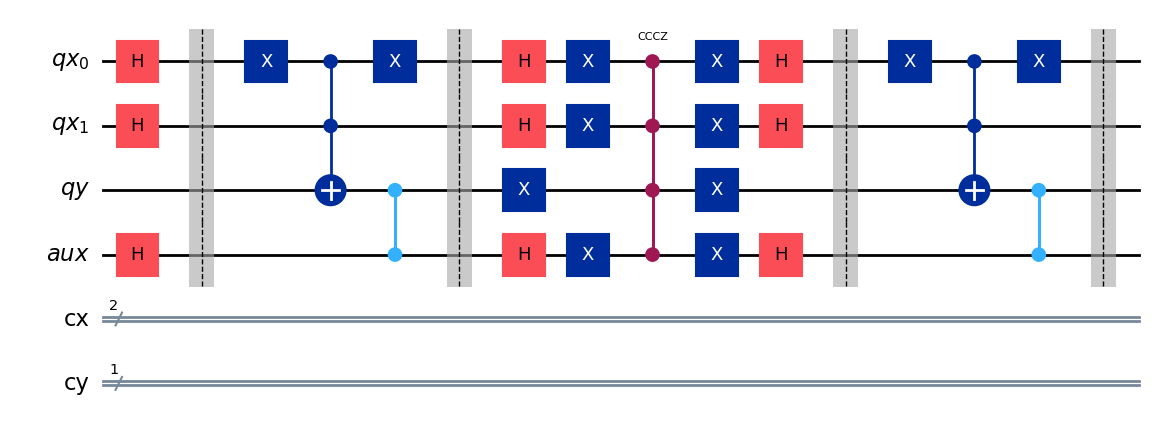

In [11]:
apply_oracle()
qc.draw('mpl')

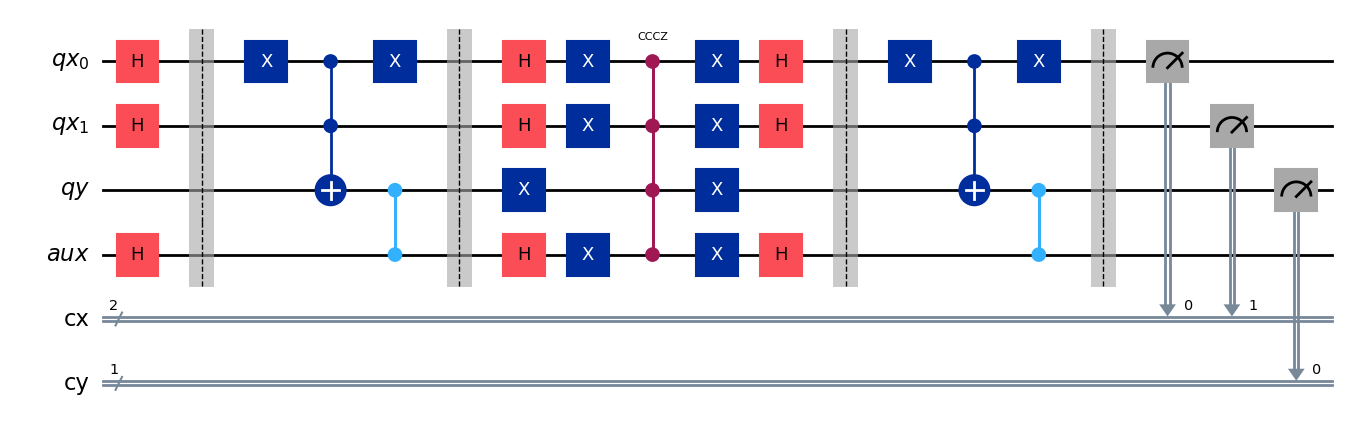

In [12]:
qc.measure(qx, cx)
qc.measure(qy, cy)
qc.draw('mpl')

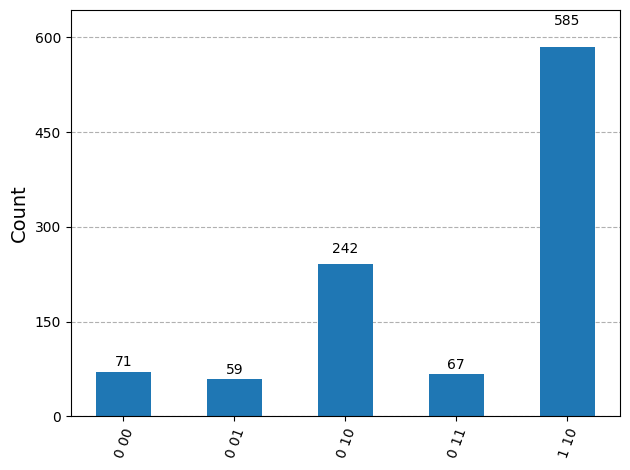

In [13]:
from qiskit.result import counts
simulator = AerSimulator()
tqc = transpile(qc, simulator)
job = simulator.run(tqc, shot=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)